### Week 10: 2D fft, image compression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image

In [5]:
# convert from RGB to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

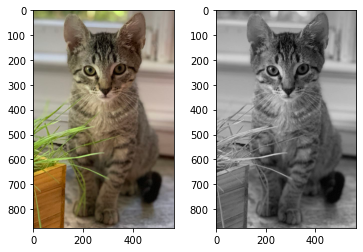

In [6]:
# read image, convert to grayscale
img_rgb=image.imread("cat.png")
img_gray=rgb2gray(img_rgb)

plt.figure()
# colored image
plt.subplot(121)
plt.imshow(img_rgb, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
# grayscale image
plt.subplot(122)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.show()

In [15]:
# apply FFT, remove X% of the frequency data with low power
X=80
c1=np.fft.fft2(img_gray)
cutoff=np.percentile(abs(c1),X)
cX=c1
cX[abs(c1)<cutoff]=0

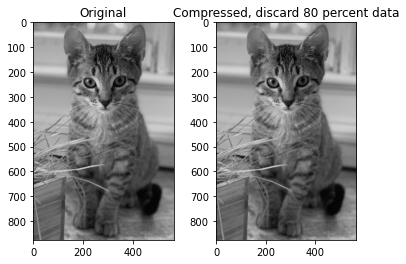

In [16]:
# inverse FFT, reconstruct image
img_reconstruct=np.fft.ifft2(cX)
img_reconstruct=np.real(img_reconstruct)

plt.figure()
# original grayscale image
plt.subplot(121)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.title('Original')
# compressed image
plt.subplot(122)
plt.imshow(img_reconstruct, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.title('Compressed, discard '+str(X)+' percent data')
plt.savefig('cat_compressed'+'.png',bbox_inches="tight",dpi=300)
plt.show()


